## The Heat Equation

$\frac{\partial u(x, t)}{\partial t} = \alpha \nabla^2 u(x, t)$

This equation describes how the distribution of heat evolves over time as a second order spatial function. Here, $\alpha$ represents the thermal diffusivity of the material in consideration, basically how dictating how good a conductor a material is for higher $\alpha$ values. $u(x, t)$ is the heat distribution and solution to our system.

#### Derivation
Following along with Stanford's document, we consider the change of internal energy as heat in - heat out. Formally, $\frac{\partial H(t)}{\partial t} = \int_D c \rho \frac{\partial u(x, t)}{\partial t} \, dx$ where u is the heat distribution, c is the specific heat of the material and $\rho$ is its density. From Fourier's law, the rate of change of heat is $\int_{dD} \nabla u \cdot n \, dS$ basically implying that heat leaves at the boundaries which makes sense since we are considering conduction as the method of heat transfer for our system. Equating both and using Divergence theorem we arrive at the heat equation $\frac{\partial u(x, t)}{\partial t} = \alpha \nabla^2 u(x, t)$ where $\alpha = \frac{\kappa}{c\rho}$ where $\kappa$ is the rate constant dictating change in heat w.r.t the temperature gradient in Fourier's law

#### Solution

Defining our system as,
$$ \frac{\partial u(x, t)}{\partial t} = \alpha \nabla^2 u(x, t), 0 < x < L $$
Dirichlet Boundary Conditions
$$ u(0,t) = 0, u(L, t) = 0 $$
Initial Conditions
$$ u(x, 0) = f(x, 0) $$

Using the Seperation of Variables approach
let $u(x, t) = X(x)T(t)$ then our system becomes $X(x)T'(t) = \alpha X''(x)T(t)$ which we can separate as $\frac{X''(x)}{X(x)} = \frac{T'(t)}{\alpha T(t)}$ which we can also extend to a third variable $\lambda$ such that $\frac{X''(x)}{X(x)} = -\lambda = \frac{T'(t)}{\alpha T(t)}$ giving us a system of two solvable partial differentials. 

There is a slight aribtration from our side where we use a negative sign on $\lambda$. I believe the reason for this is because when we solve the second-order differential for X we can reason that we expect a decaying solution, however with a positive $\lambda$ we are more likely to get exponentially increasing solutions which are counter-intuitive. With a solution of a sinusoidal form, we can constrict the solution and enforce the decay with a greater physical understanding. There may be a simpler reason than my yapping which I would love to find as well. Back to our system, we derived

$$ X''(x) + \lambda X(x) = 0 $$ 
and
$$ T'(t) + \lambda \alpha T(t) = 0 $$

Solving for X, we can see $X(x) = A \cos(\sqrt{\lambda}) + B \sin(\sqrt{\lambda})$. Enforcing boundary conditions that $X(0) = 0$ and $X(L) = 0$ we end up with $X(x) = B \sin(\sqrt{\lambda})$ and $\lambda = (\frac{n\pi}{L})^2$

In most of the references there seems to be a subscript n attached to B and X which I believe denotes the mode of the system since this is a textbook eigenvalue probelm. While I do provide the ability to mess around with modes in my code below, I do not touch upon its physical significance beyond the fact that the mode represents a solution of the system satisfying the imposed ICs and BCs.

Similarly, now solving the temporal differential we see $T(t) = \exp(-\lambda\alpha t)$ so we conclude with $u(x, t) = \exp(-\lambda\alpha t) \sin(\sqrt{\lambda})$. To account for modes, one would simply need to sum $u(x, t)$ over n 


#### References:

https://web.stanford.edu/class/math220b/handouts/heateqn.pdf
https://math.libretexts.org/Bookshelves/Differential_Equations/Elementary_Differential_Equations_with_Boundary_Value_Problems_(Trench)/12%3A_Fourier_Solutions_of_Partial_Differential_Equations/12.01%3A_The_Heat_Equation
https://math.libretexts.org/Bookshelves/Differential_Equations/Differential_Equations_for_Engineers_(Lebl)/4%3A_Fourier_series_and_PDEs/4.06%3A_PDEs_separation_of_variables_and_the_heat_equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000
T = 1
X = 1

# Create arrays for t and x
t_values = np.arange(0, T, 0.1)
x_values = np.arange(0, X, 0.1)

# Initialize the lists to store sums
s_n_values = []
s_t_values = np.zeros(len(t_values))
s_x_values = np.zeros(len(x_values))

s_n = 0
for n in range(1, N):
    for t_index, t in enumerate(t_values):
        for x_index, x in enumerate(x_values):
            s = np.exp(-n**2 * (np.pi ** 2) * t) * np.sin(n * np.pi * x)
            s_t_values[t_index] += s
            s_x_values[x_index] += s
    s_n += s
    s_n_values.append(s_n)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(range(1, N), s_n_values, label="Sum over n")
plt.xlabel('n')
plt.ylabel('Sum value')
plt.title('Sum vs n')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(t_values, s_t_values, label="Sum over t")
plt.xlabel('t')
plt.ylabel('Sum value')
plt.title('Sum vs t')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(x_values, s_x_values, label="Sum over x")
plt.xlabel('x')
plt.ylabel('Sum value')
plt.title('Sum vs x')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


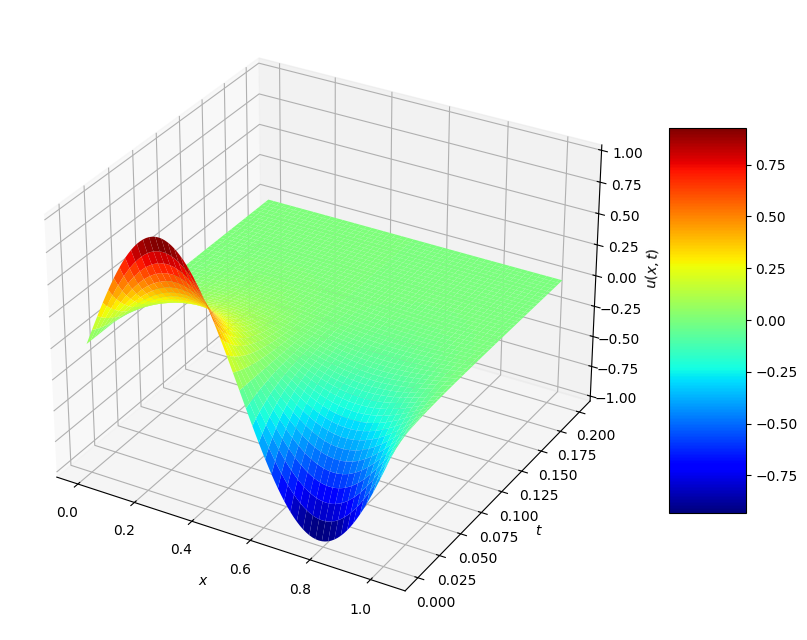

1.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L = np.pi / 3

alpha = 1

n_x = 100
#for stability t increment has to be less than
del_t =  (0.5 / alpha) * ( (L / n_x) ** 2 )

x = np.arange(0, L, (L / n_x))
t = np.arange(0, 0.2, del_t)
X, T = np.meshgrid(x, t)

n = 2
lamba_sqrt = n * np.pi / L

s = np.exp(-1 * (lamba_sqrt ** 2) * T) * np.sin(lamba_sqrt * X)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, s, cmap='jet')

ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$u(x, t)$')

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()
np.amax(s)

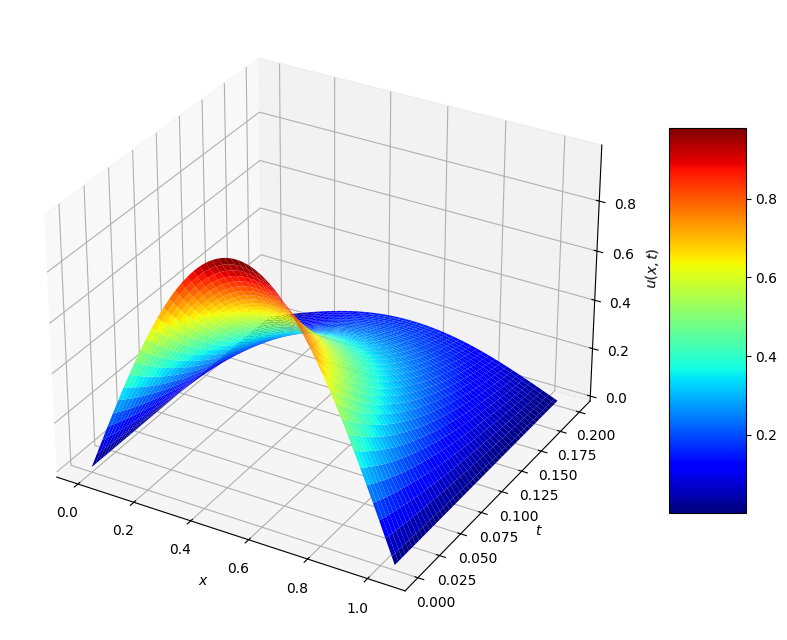

0.9998741276738751

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# T(x, t+k) = a T(x - h, t) + (1-2a)T(x, t) + a T(x + h, t)
# T i,j = aT(i-1,j-1) + (1-2a)T(i, j-1) + aT(i+1, j-1)
# a = k/h^2
L = np.pi/3
t_max = 0.2
alpha = 1
n_x = 100

del_t =  (0.5 / alpha) * ( (L / n_x) ** 2 )
del_x = L / n_x

x = np.linspace(0, L, n_x)
t = np.arange(0, t_max, del_t)
X, T = np.meshgrid(x, t)

bc = [0,0]
n = 1

# lambda = (n * pi / L) ** 2
ic = np.sin(np.pi * n / L * x)


u = np.zeros((len(t), len(x)))

u[0, :] = ic
u[:, -1] = bc[1]
u[:,0] = bc[0]

a = alpha * (del_t / del_x ** 2)
for j in range(0, len(t) - 1):
    for i in range(1, len(x) - 1):
        u[j + 1, i] = a * u[j, i - 1] + (1 - 2 * a) * u[j, i] + a * u[j, i + 1]
        # u[t, x]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, u, cmap='jet')

ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$u(x, t)$')

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()
np.amax(u)

Solving 2D now
Derived equation for $u(x, y, t) = \sum_{m=1}^M\sum_{n = 1}^N e^{-\alpha \lambda_{n,m} t} sin({\sqrt{\beta_n}x})sin({\sqrt{\lambda_{n,m} - \beta_n}y})$
where $\lambda_{n,m} = ({\frac{n\pi}{L}})^2 + ({\frac{m\pi}{L}})^2$
and $\beta_n = ({\frac{n\pi}{L}})^2$

Taking a similar approach to plotting the 1D case, first modelling the equation and then applying the finite difference method to confirm that the analytical and numerical solutions match

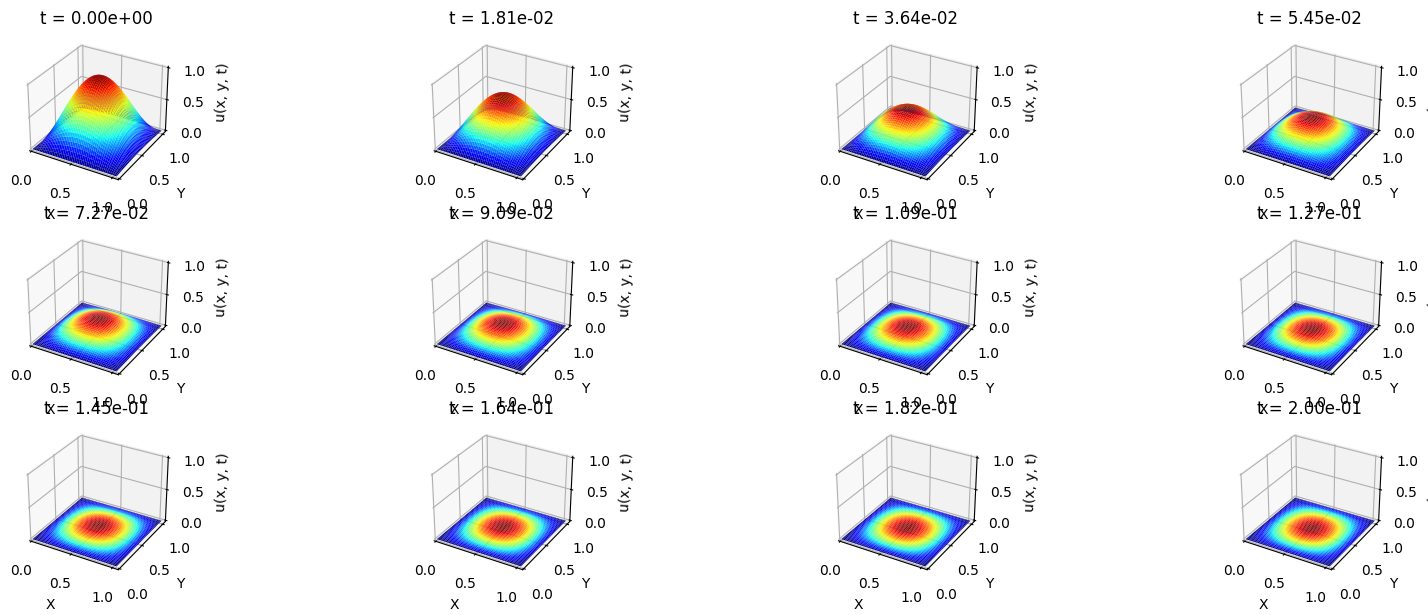

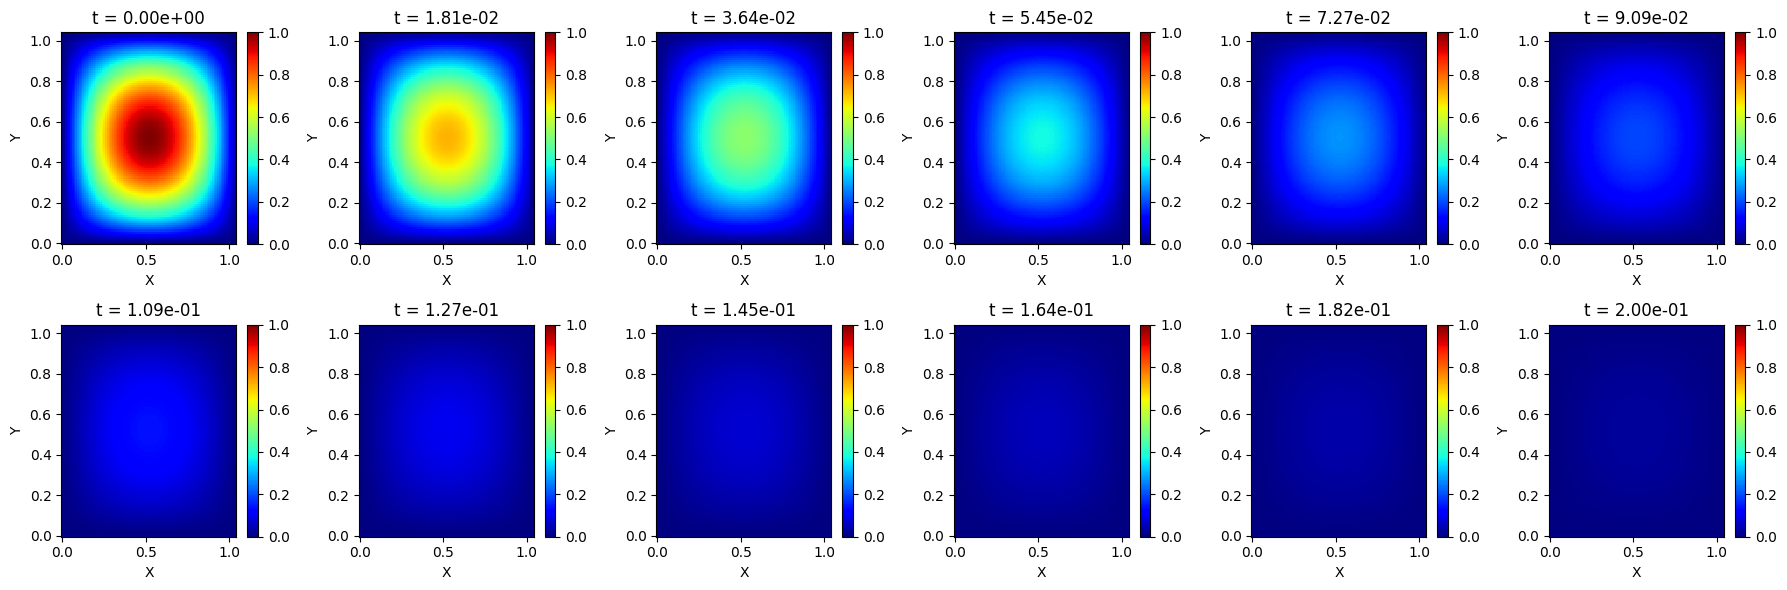

In [12]:
import numpy as np
import matplotlib.pyplot as plt

L = np.pi / 3

alpha = 1
k = 1
n_x = 100
t_max = 0.2
del_x = (L / n_x)
del_t = (0.5 / alpha) * (del_x ** 2)

x = np.arange(0, L, del_x)
y = np.arange(0, L, del_x)
t = np.arange(0, t_max, del_t)
X, Y = np.meshgrid(x, y)

n = 1
m = 1

lamba_sqrt = np.sqrt((n * np.pi / L) ** 2 + (m * np.pi / L) ** 2)
beta_sqrt = m * np.pi / L
lamba_minus_beta_sqrt = (n * np.pi / L)

def heat_eq(X, Y, T, beta_sqrt, lamba_minus_beta_sqrt, lamba_sqrt):
    return np.exp(-1 * k * (lamba_sqrt ** 2) * T) * np.sin(beta_sqrt * X) * np.sin(lamba_minus_beta_sqrt * Y)

# Plotting the first set of figures with 3D plots
fig1 = plt.figure(figsize=(18, 6))
num_plots = min(len(t), 12)
plot_indices = np.linspace(0, len(t) - 1, num_plots).astype(int)

for i, idx in enumerate(plot_indices):
    t_step = t[idx]
    u = heat_eq(X, Y, t_step, beta_sqrt, lamba_minus_beta_sqrt, lamba_sqrt)

    ax = fig1.add_subplot(3, 4, i + 1, projection='3d')
    surf = ax.plot_surface(X, Y, u, cmap='jet')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('u(x, y, t)')
    ax.set_title(f't = {t_step:.2e}')

    # Setting fixed axis limits for Z-axis
    ax.set_xlim([0, L])
    ax.set_ylim([0, L])
    ax.set_zlim([0, 1])  # <-- Set Z-axis limit to [0, 1]

plt.tight_layout()

plt.savefig("2DHE.png")
plt.show()
# Plotting the second set of figures with pcolormesh plots
fig2, axs = plt.subplots(2, 6, figsize=(18, 6))
num_plots = min(len(t), 12)
plot_indices = np.linspace(0, len(t) - 1, num_plots).astype(int)
for i, idx in enumerate(plot_indices):
    t_step = t[idx]
    u = heat_eq(X, Y, t_step, beta_sqrt, lamba_minus_beta_sqrt, lamba_sqrt)

    ax = axs.flatten()[i]
    c = ax.pcolormesh(X, Y, u, shading='auto', cmap='jet', vmin=0, vmax=1)  # <-- Set vmin=0, vmax=1 here
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f't = {t_step:.2e}')

    fig2.colorbar(c, ax=ax)

plt.tight_layout()

plt.savefig("HeatEq2d.png")
plt.show()


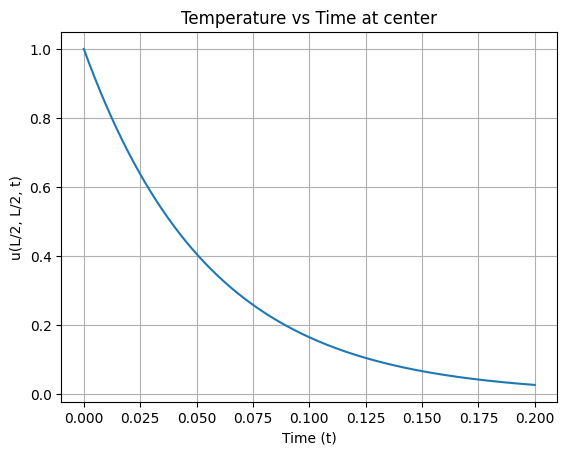

In [7]:
import numpy as np
import matplotlib.pyplot as plt

L = np.pi / 3
alpha = 1
k = 1
n_x = 100
t_max = 0.2
del_x = L / n_x
# For stability, t increment has to be less than a specific value
del_t = (0.5 / alpha) * (del_x ** 2)

x = np.arange(0, L, del_x)
y = np.arange(0, L, del_x)
t = np.arange(0, t_max, del_t)
X, Y = np.meshgrid(x, y)

n = 1
m = 1
lambda_sqrt = np.sqrt((n * np.pi / L) ** 2 + (m * np.pi / L) ** 2)
beta_sqrt = m * np.pi / L
lambda_minus_beta_sqrt = n * np.pi / L

x_center = L / 2
y_center = L / 2

u_center = np.array([heat_eq(x_center, y_center, t_step, beta_sqrt, lambda_minus_beta_sqrt, lambda_sqrt) for t_step in t])

plt.figure()
plt.plot(t, u_center)
plt.xlabel('Time (t)')
plt.ylabel('u(L/2, L/2, t)')
plt.title('Temperature vs Time at center')
plt.grid(True)
plt.show()


Now to check results by comparing with the finite difference method with the equation being:

$u_{i,j}^{n+1} = u_{i,j}^n + \alpha \triangle t [ \frac{u_{i+1, j}^n - 2u_{i,j}^n + u_{i-1,j}^n}{\triangle x^2} + \frac{u_{i, j + 1}^n - 2u_{i,j}^n + u_{i,j - 1}^n}{\triangle y^2} ]$

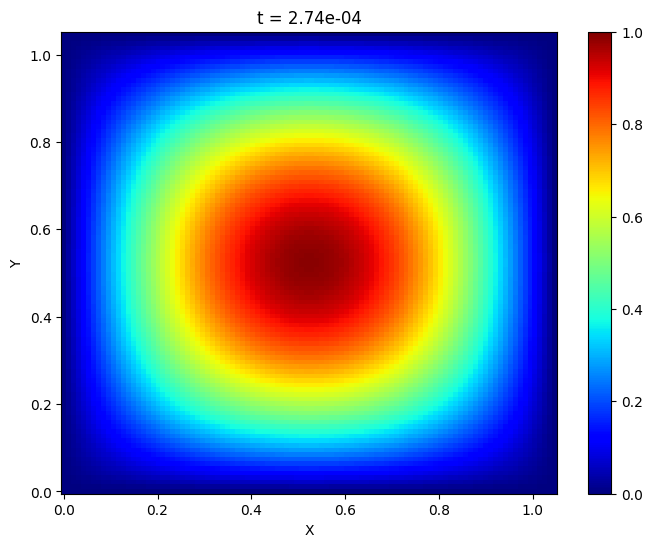

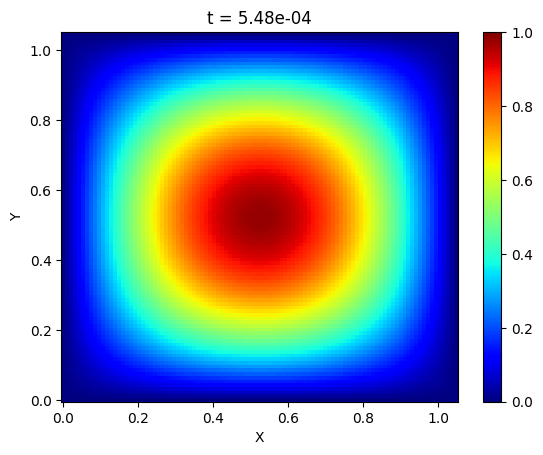

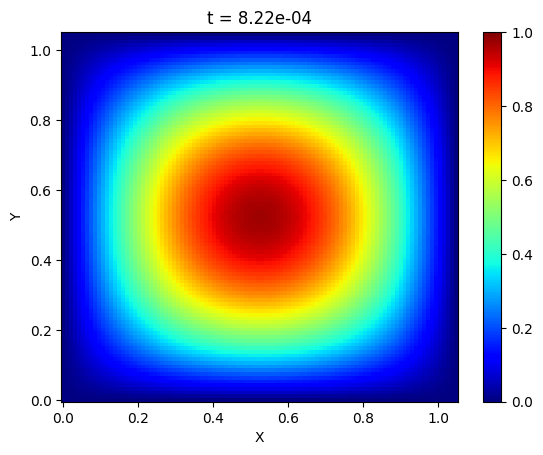

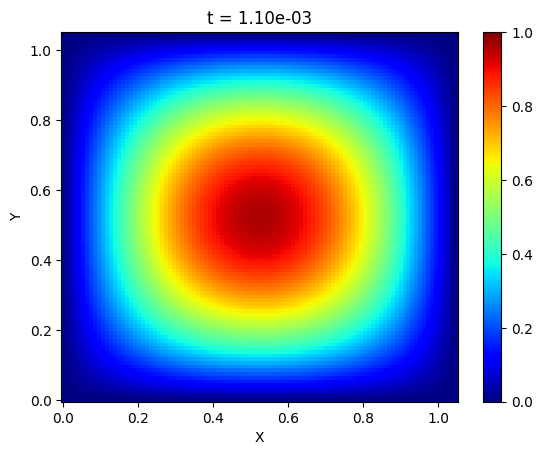

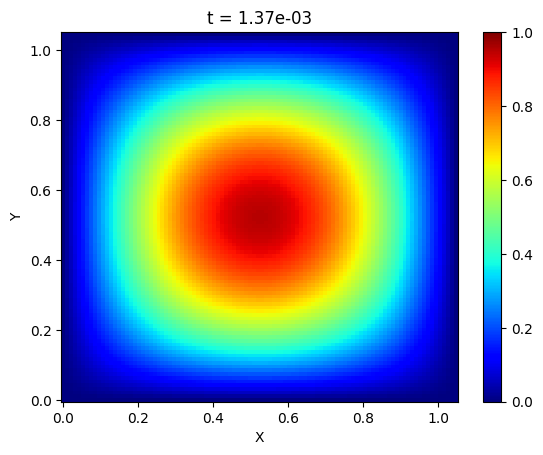

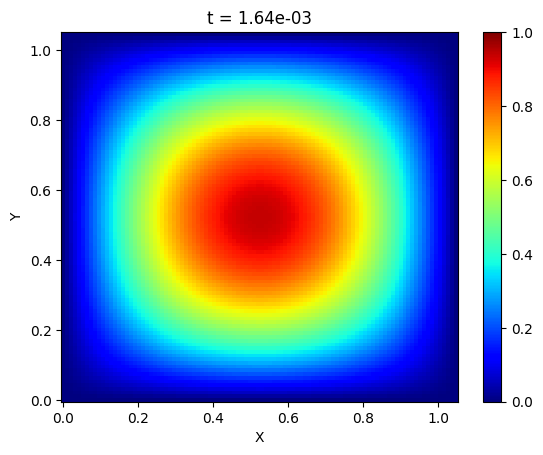

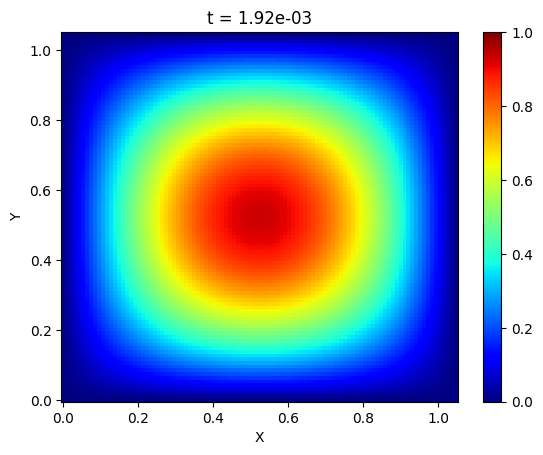

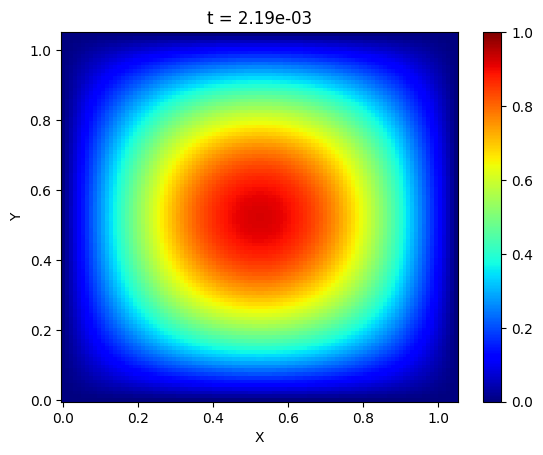

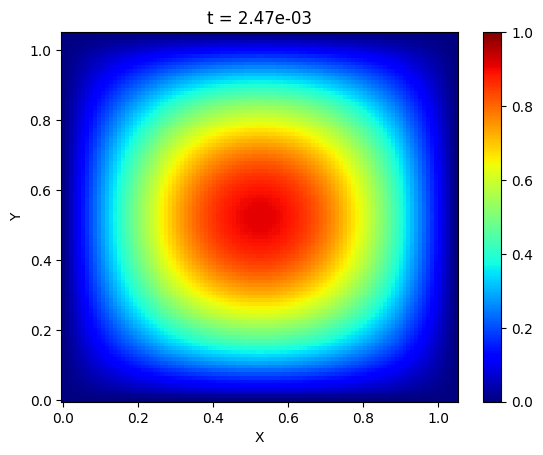

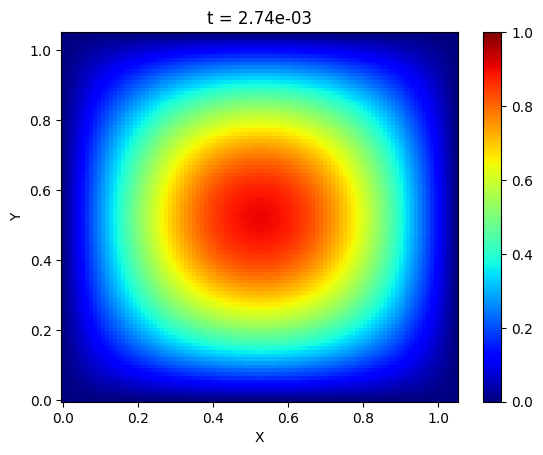

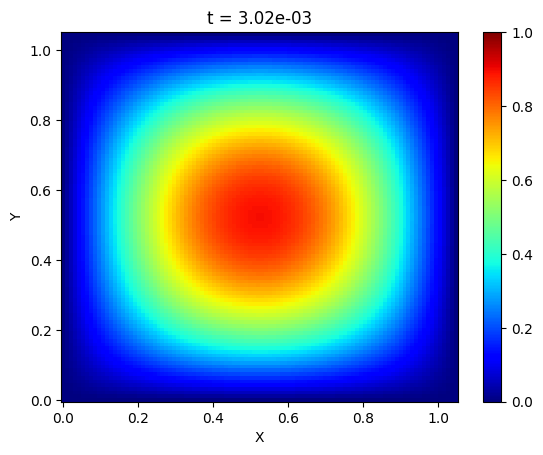

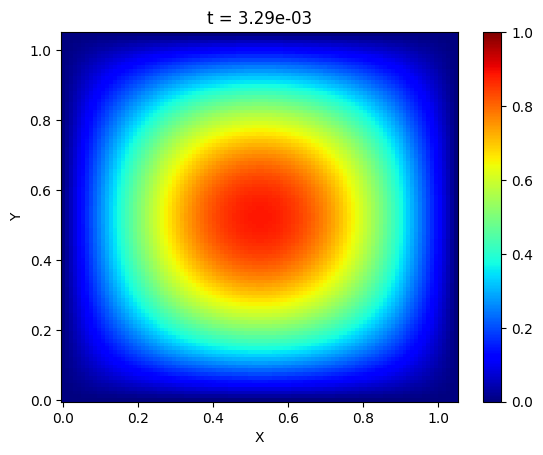

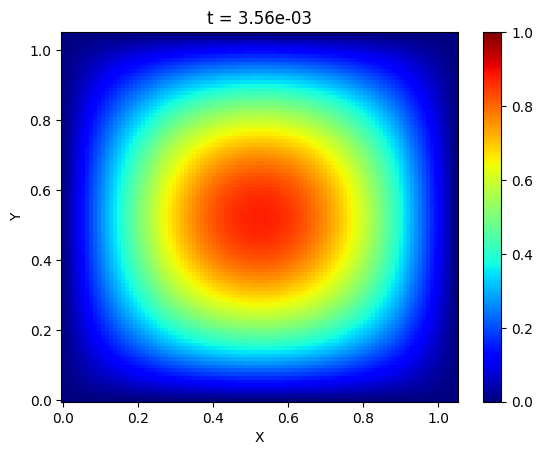

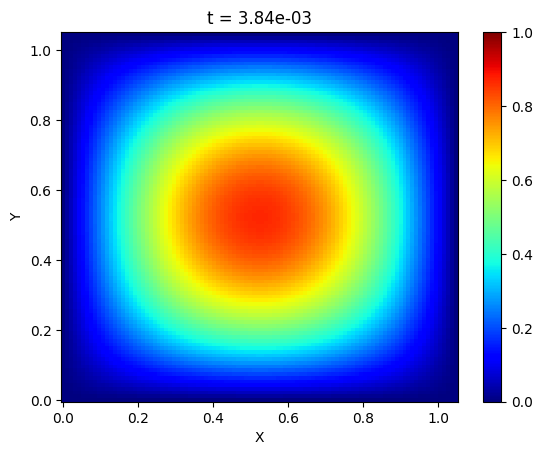

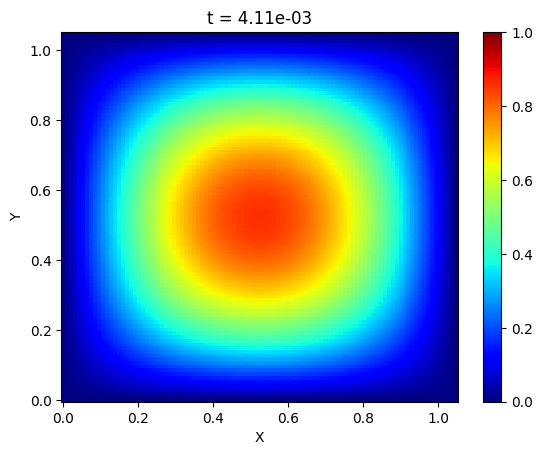

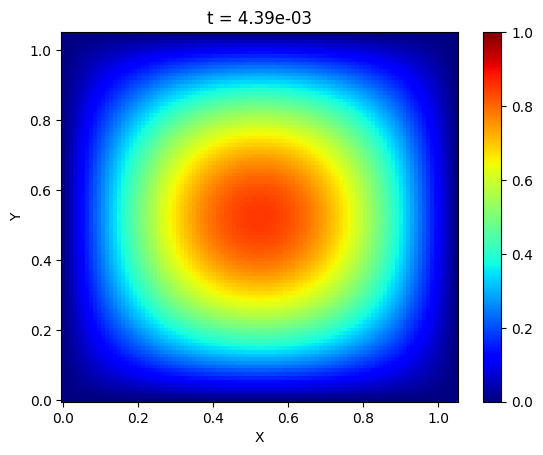

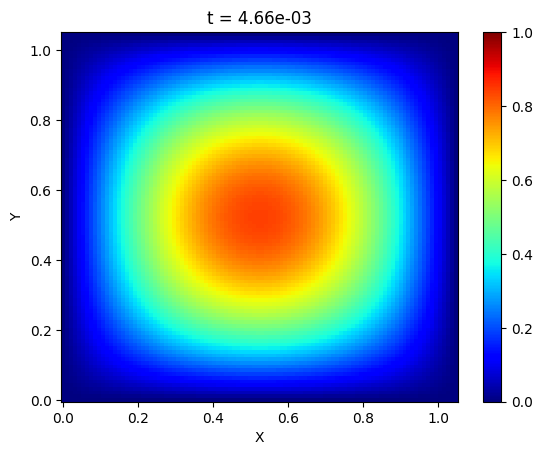

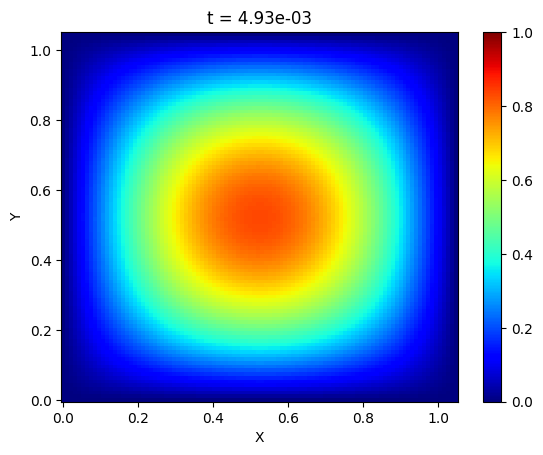

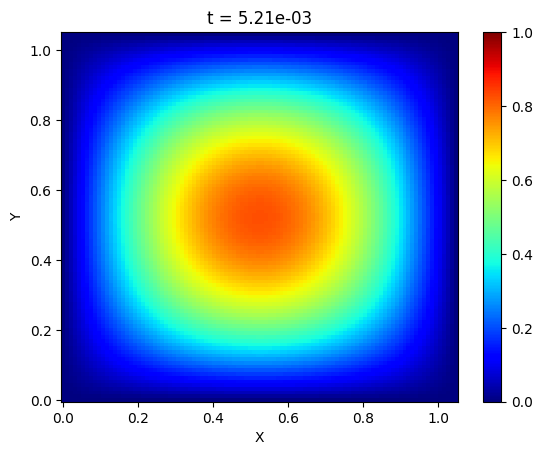

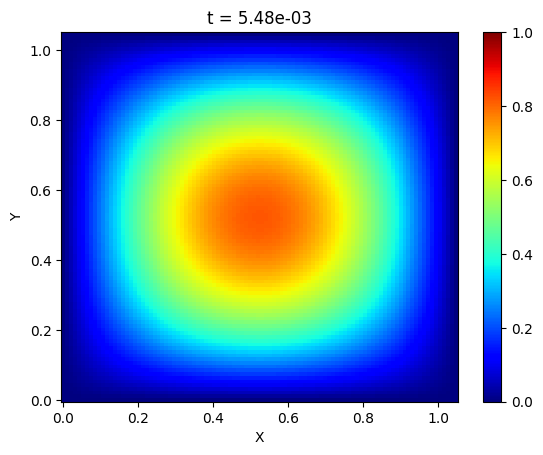

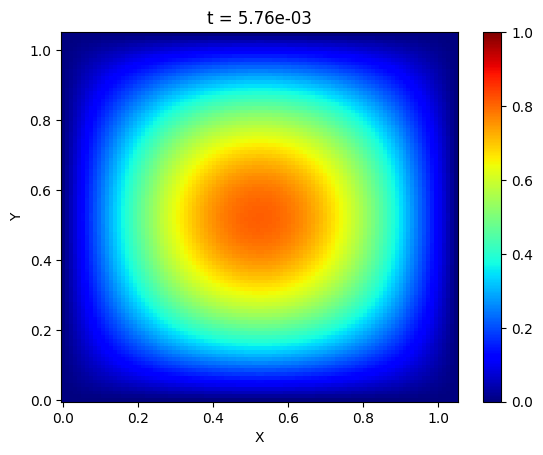

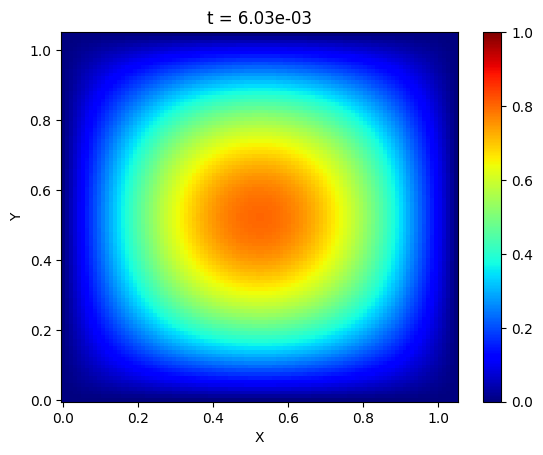

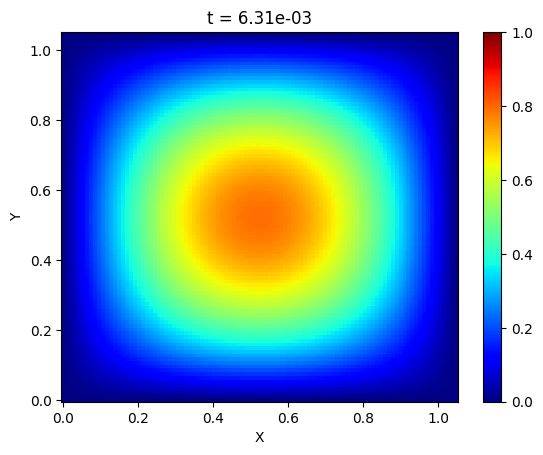

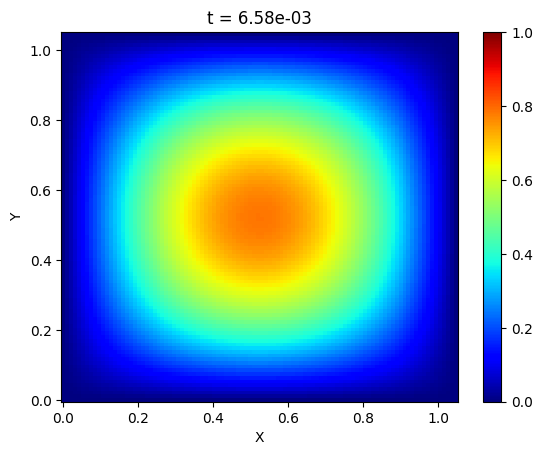

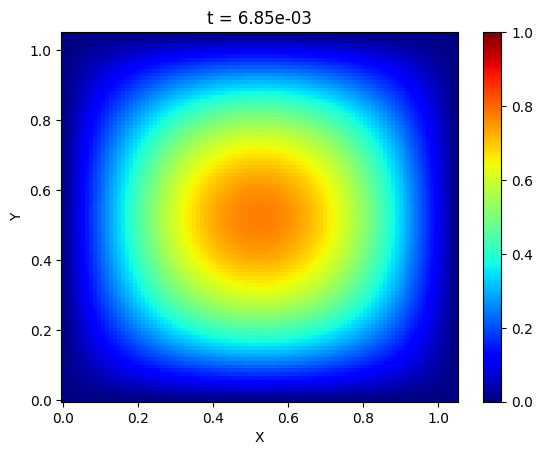

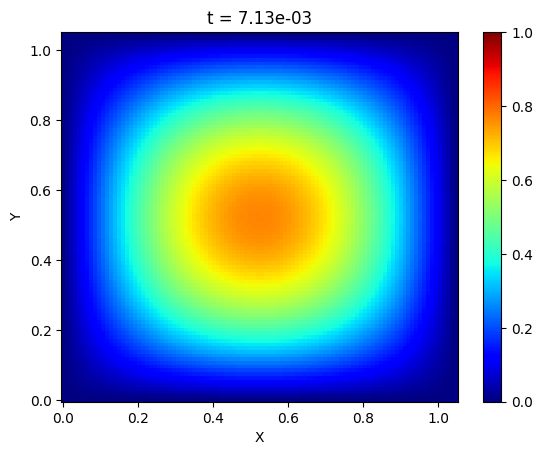

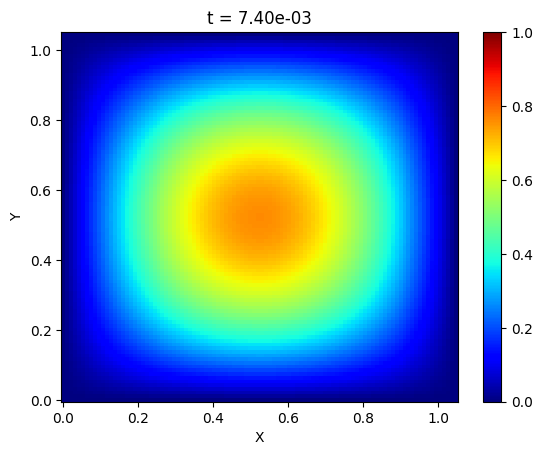

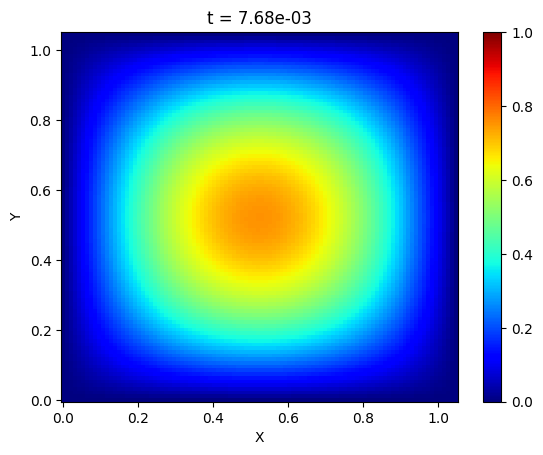

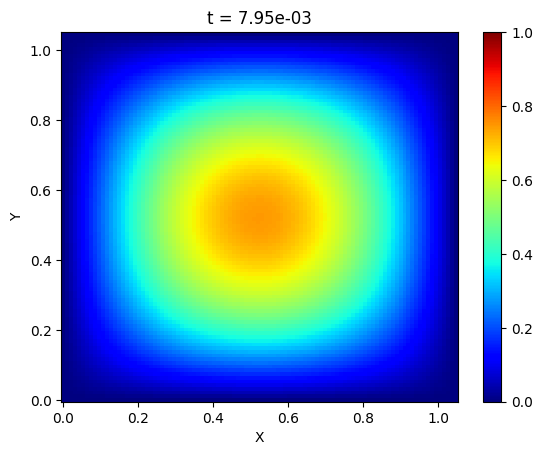

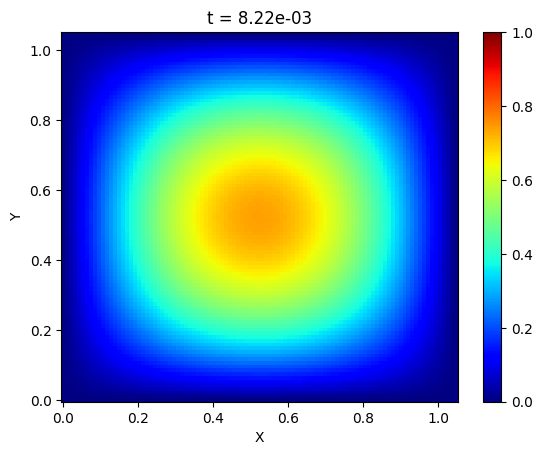

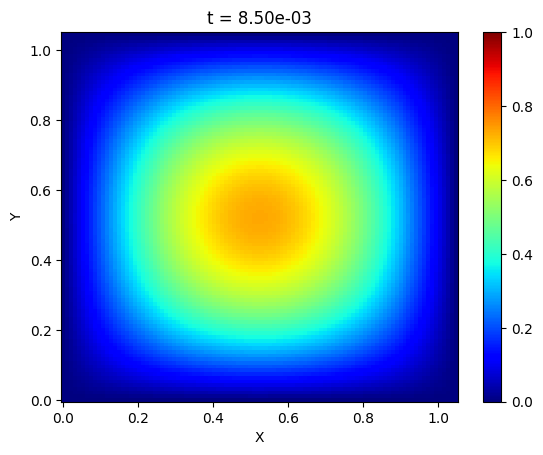

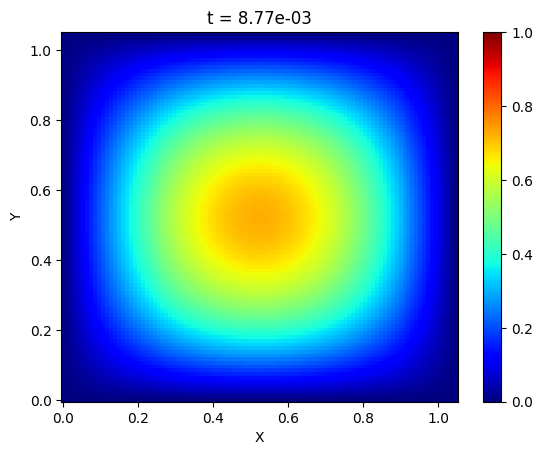

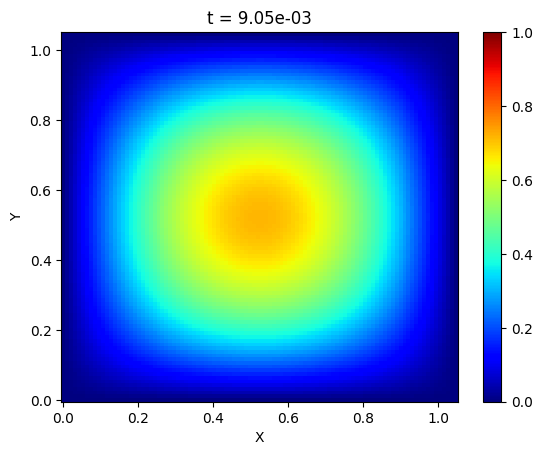

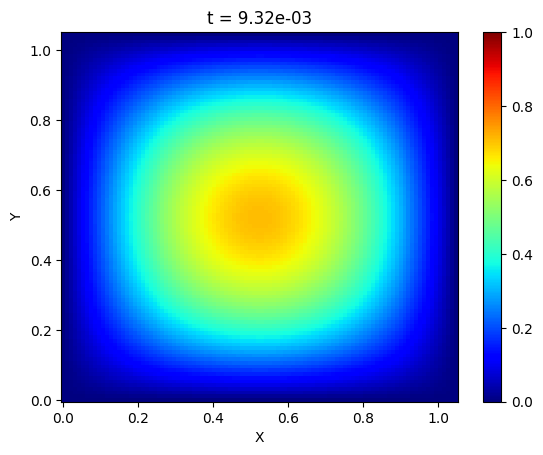

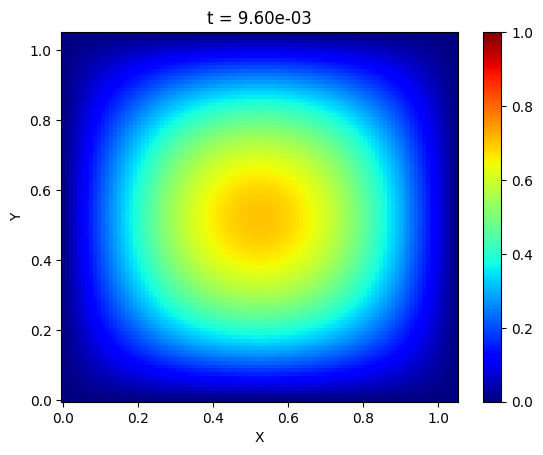

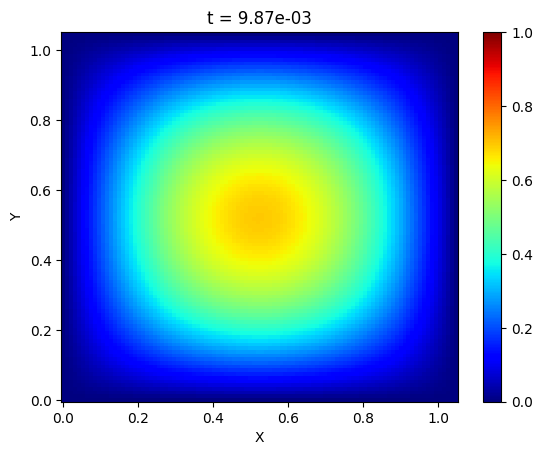

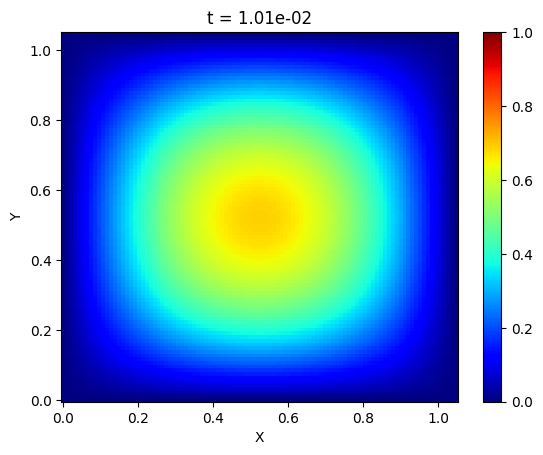

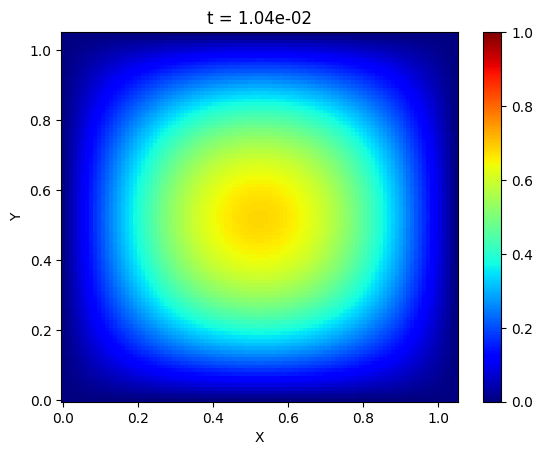

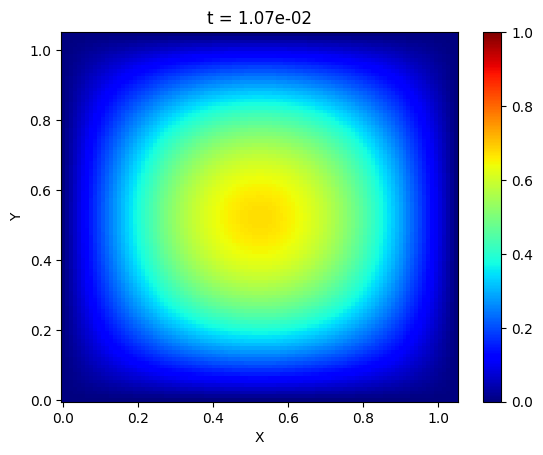

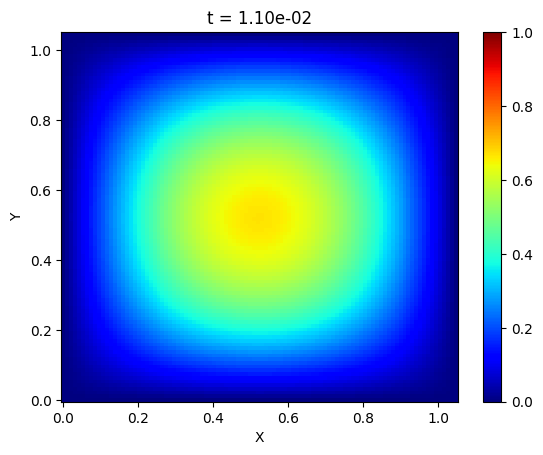

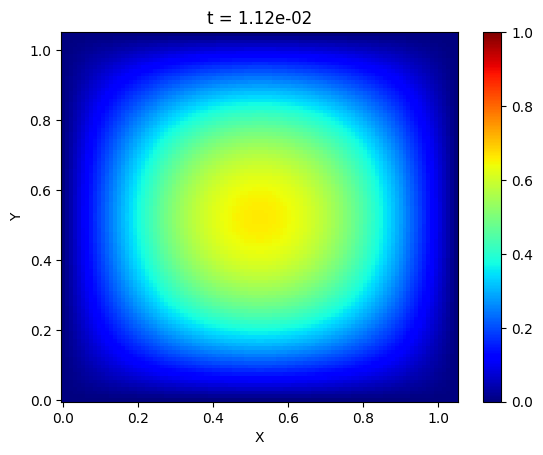

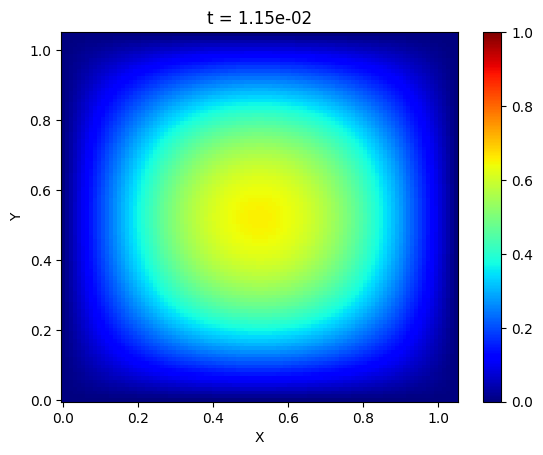

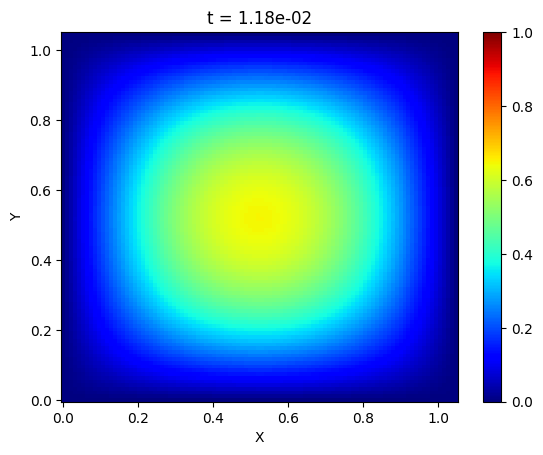

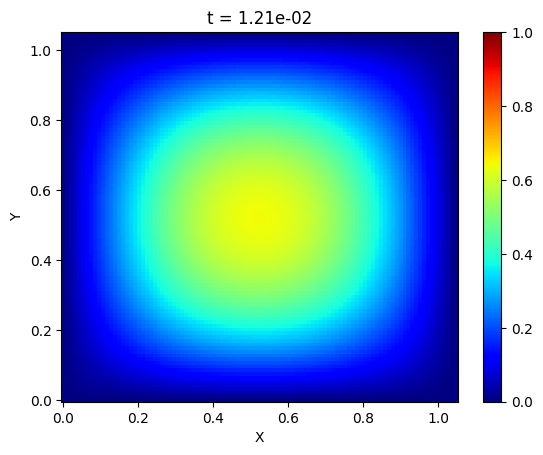

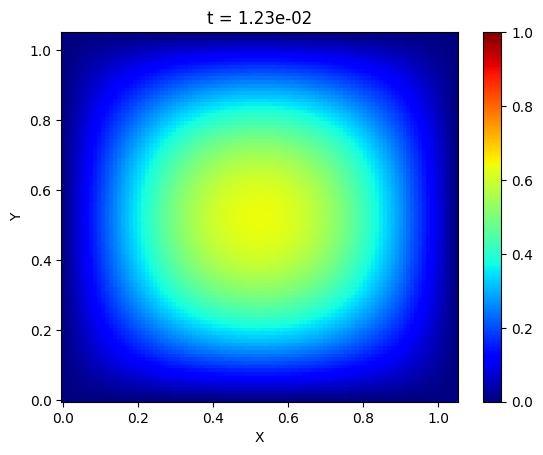

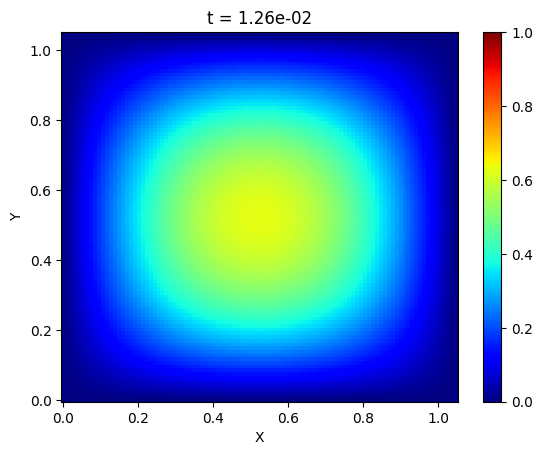

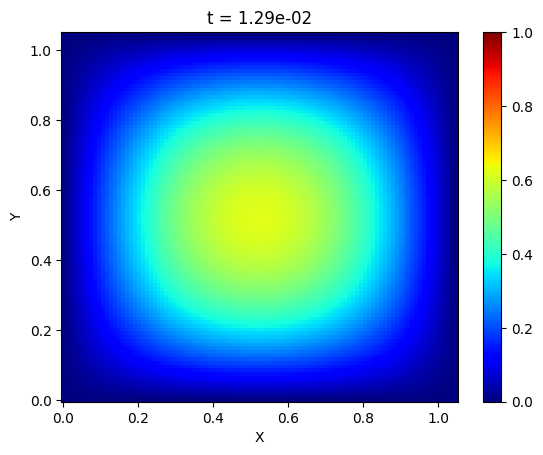

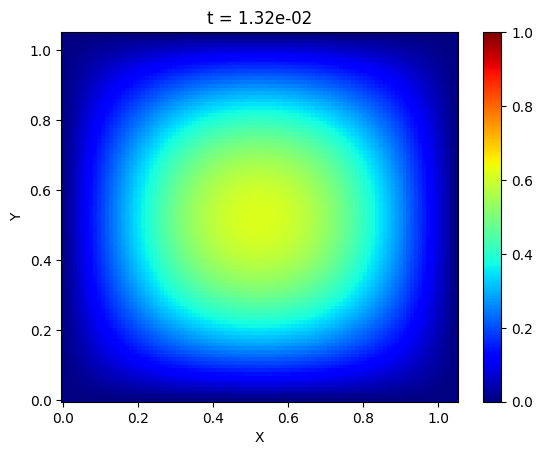

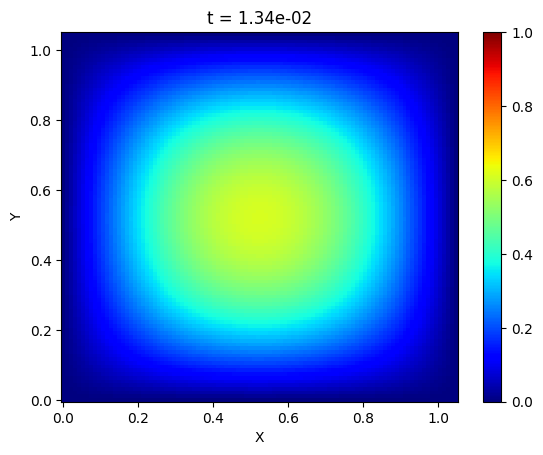

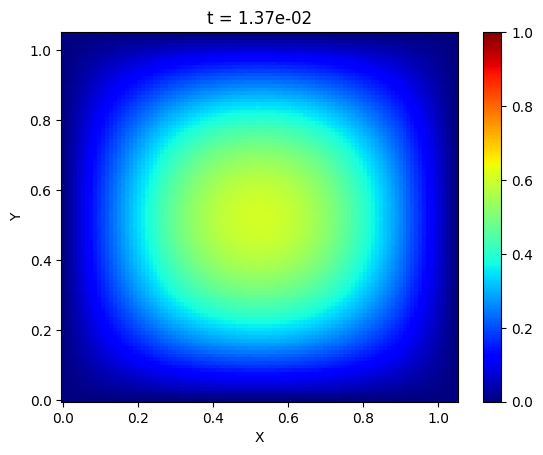

In [19]:
import numpy as np
import matplotlib.pyplot as plt

Lx = np.pi / 3  
Ly = np.pi / 3 
alpha = 1  
n_x = 100  
t_max = 0.2 

del_x = Lx / n_x
del_y = Ly / n_x  

del_t = (0.5 / (alpha * ( del_x ** 2 + del_y ** 2 ))) * (del_x ** 2 * del_y ** 2)

x = np.linspace(0, Lx, n_x)
y = np.linspace(0, Ly, n_x)
t = np.arange(0, t_max, del_t)
X, Y = np.meshgrid(x, y)

u = np.sin(np.pi * X / Lx) * np.sin(np.pi * Y / Ly)

plt.figure(figsize=(8, 6))
for n in range(1, len(t)):
    for i in range(1, n_x - 1):
        for j in range(1, n_x - 1):
            u[i, j] = (u[i, j] + alpha * del_t * 
                       ((u[i+1, j] - 2 * u[i, j] + u[i-1, j]) / del_x**2 +
                        (u[i, j+1] - 2 * u[i, j] + u[i, j-1]) / del_y**2))

    if n <= 500 and n % 10 == 0:  # Save every 1000th plot
        plt.clf()
        plt.pcolormesh(X, Y, u, shading='auto', cmap='jet', vmin=0, vmax=1)
        plt.colorbar()
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f't = {t[n]:.2e}')
        plt.savefig(f"HeatEq2dFDE_{n}.png")  # Save with a unique file name
        plt.pause(0.01)

plt.show()
